In [7]:
# Importing libraries
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
#read in data set from data_merge.ipynb
df = pd.read_csv('AQI_temp.csv')
df.head()

,Fips,Year,Temp,Tempc,Cbsa_code,Csacode,Cbsatitle,Csatitle,County,Statename,Fipsstatecode,Fipscountycode,Cbsa,Days_with_aqi,Good_days,Moderate_days,Unhealthy_for_sensitive_groups_days,Unhealthy_days,Very_unhealthy_days,Hazardous_days,Max_aqi,90th_percentile_aqi,Median_aqi,Days_co,Days_no2,Days_ozone,Days_pm2_5,Days_pm10
0,1001,2000,64.33,17.96,33860,388.00,"Montgomery, AL","Montgomery-Selma-Alexander City, AL",Autauga,Alabama,1,1,"Montgomery, AL",282,113,115,48,6,0,0,195,115,57,0,0,200,81,1
1,1051,2000,64.12,17.84,33860,388.00,"Montgomery, AL","Montgomery-Selma-Alexander City, AL",Elmore,Alabama,1,51,"Montgomery, AL",282,113,115,48,6,0,0,195,115,57,0,0,200,81,1
2,1085,2000,65.09,18.38,33860,388.00,"Montgomery, AL","Montgomery-Selma-Alexander City, AL",Lowndes,Alabama,1,85,"Montgomery, AL",282,113,115,48,6,0,0,195,115,57,0,0,200,81,1
3,1101,2000,64.94,18.30,33860,388.00,"Montgomery, AL","Montgomery-Selma-Alexander City, AL",Montgomery,Alabama,1,101,"Montgomery, AL",282,113,115,48,6,0,0,195,115,57,0,0,200,81,1
4,1001,2001,63.76,17.64,33860,388.00,"Montgomery, AL","Montgomery-Selma-Alexander City, AL",Autauga,Alabama,1,1,"Montgomery, AL",285,159,110,15,1,0,0,154,84,48,0,0,191,90,4


In [40]:
#Check number of states per year does not change
number_states_year = pd.DataFrame(df.groupby(df.Year)['Statename'].nunique())
number_states_year.rename(columns={'Statename':'Number of States'}, inplace=True)
number_states_year.T

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Number of States,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49


In [76]:
# Check how the reporting sites changes for each state over time
df.Statename.groupby(df.Year).value_counts().unstack()

Statename,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,31,10,30,45,26,8,3,1,41,75,20,41,55,25,17,49,39,6,18,12,37,33,33,28,10,20,7,7,20,16,39,57,7,48,28,18,38,5,28,10,49,62,11,6,82,24,27,32,10
2001,31,10,30,45,26,8,3,1,43,75,21,42,55,26,17,50,39,6,18,12,38,31,34,30,10,20,7,7,20,16,39,58,7,47,27,18,38,5,28,10,50,62,11,6,80,25,27,32,10
2002,31,10,30,44,23,8,3,1,42,77,22,42,54,26,22,50,39,6,18,12,37,25,35,32,10,20,7,7,20,16,39,58,6,47,27,18,38,5,29,10,48,62,11,6,80,26,28,34,10
2003,32,10,30,44,23,8,3,1,42,78,20,42,53,26,23,49,39,6,18,13,36,28,34,32,10,20,8,7,20,16,39,58,6,47,27,17,38,5,29,12,49,64,11,5,80,27,28,34,10
2004,33,10,25,44,23,8,3,1,42,78,20,42,51,26,23,49,39,6,18,13,36,27,34,32,10,20,8,7,20,16,36,56,6,47,26,18,39,5,29,12,51,62,11,5,80,26,28,32,10
2005,33,10,22,44,23,8,3,1,42,78,20,42,51,26,23,48,39,6,18,13,36,29,34,32,10,20,9,7,20,16,36,54,6,45,26,19,39,5,28,12,50,66,11,5,80,26,27,33,10
2006,32,10,24,44,23,8,3,1,42,78,18,42,51,26,23,48,37,6,18,13,35,29,32,32,10,17,9,7,20,16,36,54,6,45,24,19,40,5,28,12,48,63,11,5,78,26,26,31,10
2007,30,10,24,44,23,8,3,1,42,77,18,42,51,26,21,44,37,6,18,13,35,29,32,29,10,17,10,7,20,17,36,54,6,45,24,19,40,5,28,12,48,65,11,5,78,27,26,31,11
2008,30,9,24,44,23,8,3,1,44,77,18,42,51,26,22,44,37,6,18,13,35,29,32,29,10,17,10,7,20,17,36,52,6,45,24,20,39,5,25,12,47,68,11,5,78,27,26,31,11


In [56]:
# get mean of each state
by_state_mean = df.groupby('Statename').mean()
by_state.sort

/tmp/ipykernel_5880/1080620937.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_state_mean = df.groupby('Statename').mean()


In [59]:
#Create dataframe with average of temperature of each state to do sanity check
temp_df = pd.DataFrame(by_state_mean['Temp'])
temp_df.sort_values(by='Temp', ascending=False, inplace=True)
temp_df

,Temp
Statename,
Florida,71.39
Louisiana,67.95
Texas,67.29
Mississippi,64.45
Alabama,63.53
Georgia,63.31
South Carolina,62.98
Arizona,62.68
Arkansas,61.04


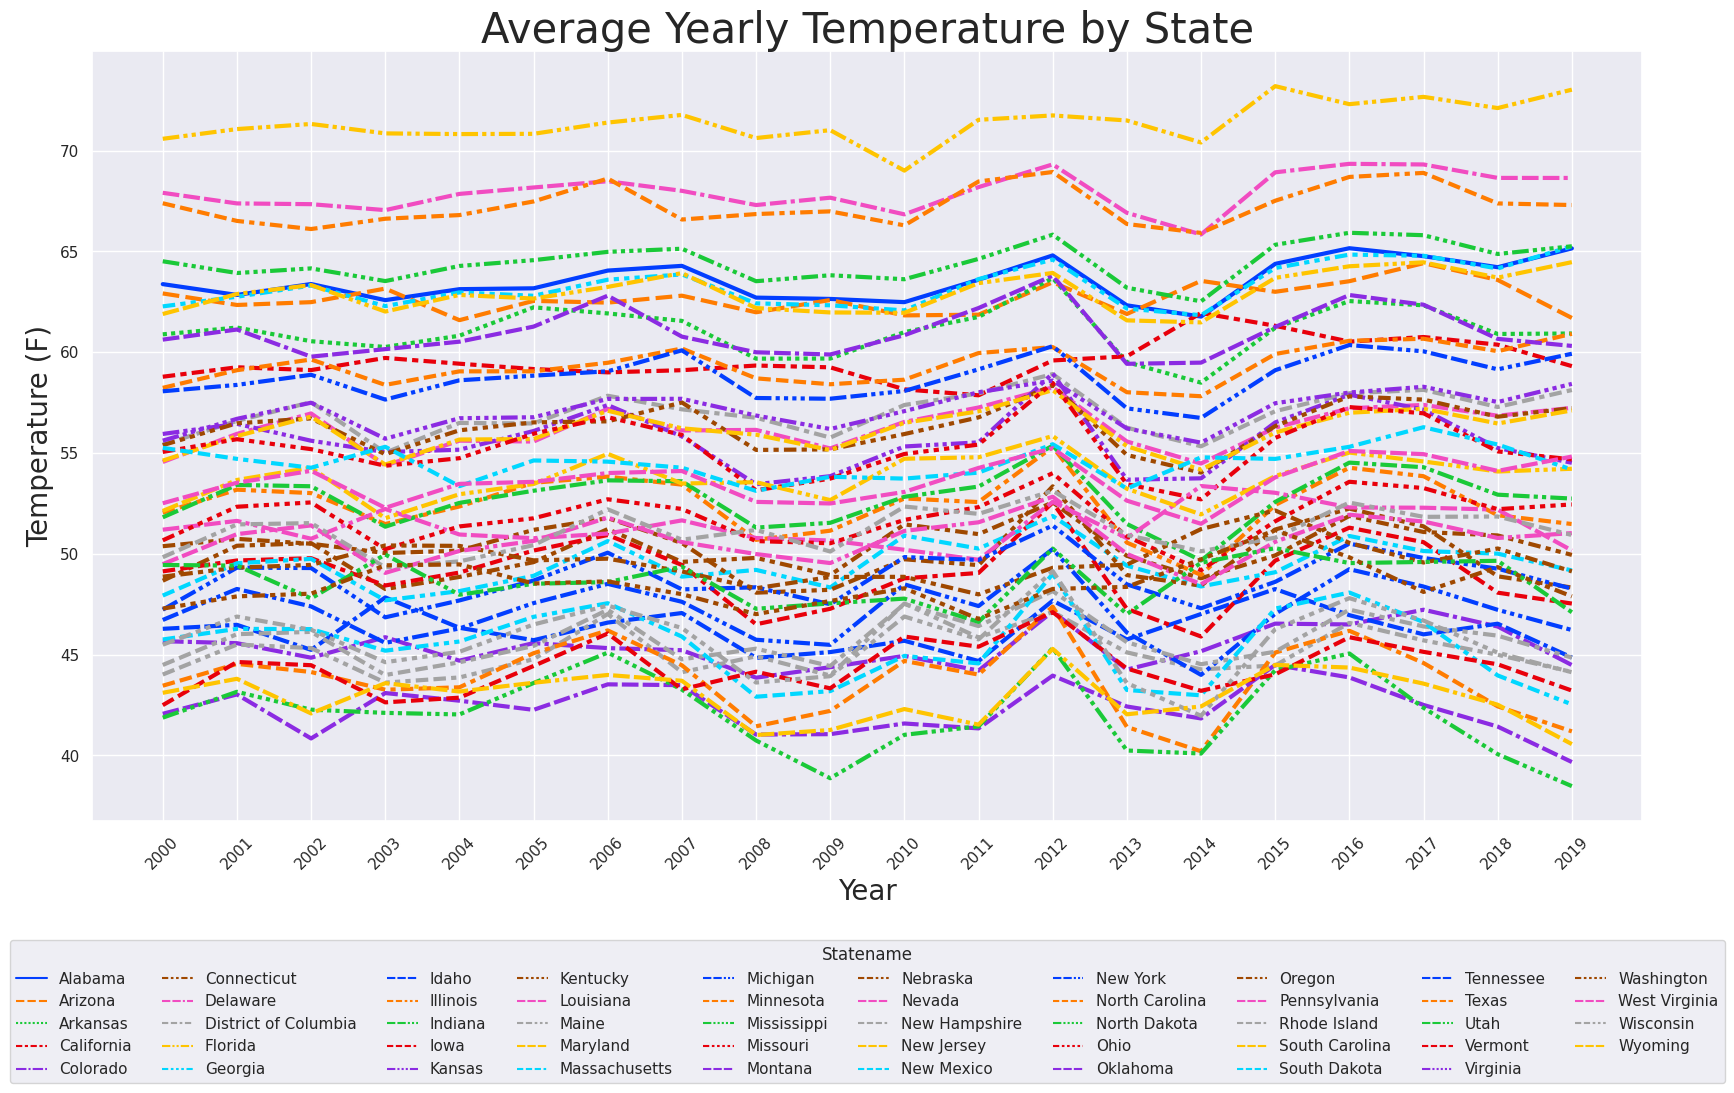

In [10]:
# Graph of average yearly temperature by state
by_state = df.groupby(['Statename', 'Year'])['Temp'].mean().unstack().T
sns.set(rc={'figure.figsize':(20, 10)})
g = sns.lineplot(data=by_state, palette='bright', linewidth=3)
sns.move_legend(g, 'lower center', bbox_to_anchor=(.5, -.35), ncol=10)
g.set_title('Average Yearly Temperature by State',fontsize=30)
g.set_ylabel('Temperature (F)', fontsize=20)
g.set_xlabel('Year', fontsize=20)
g.set_xticks(range(2000, 2020), labels=by_state.index, rotation=45)

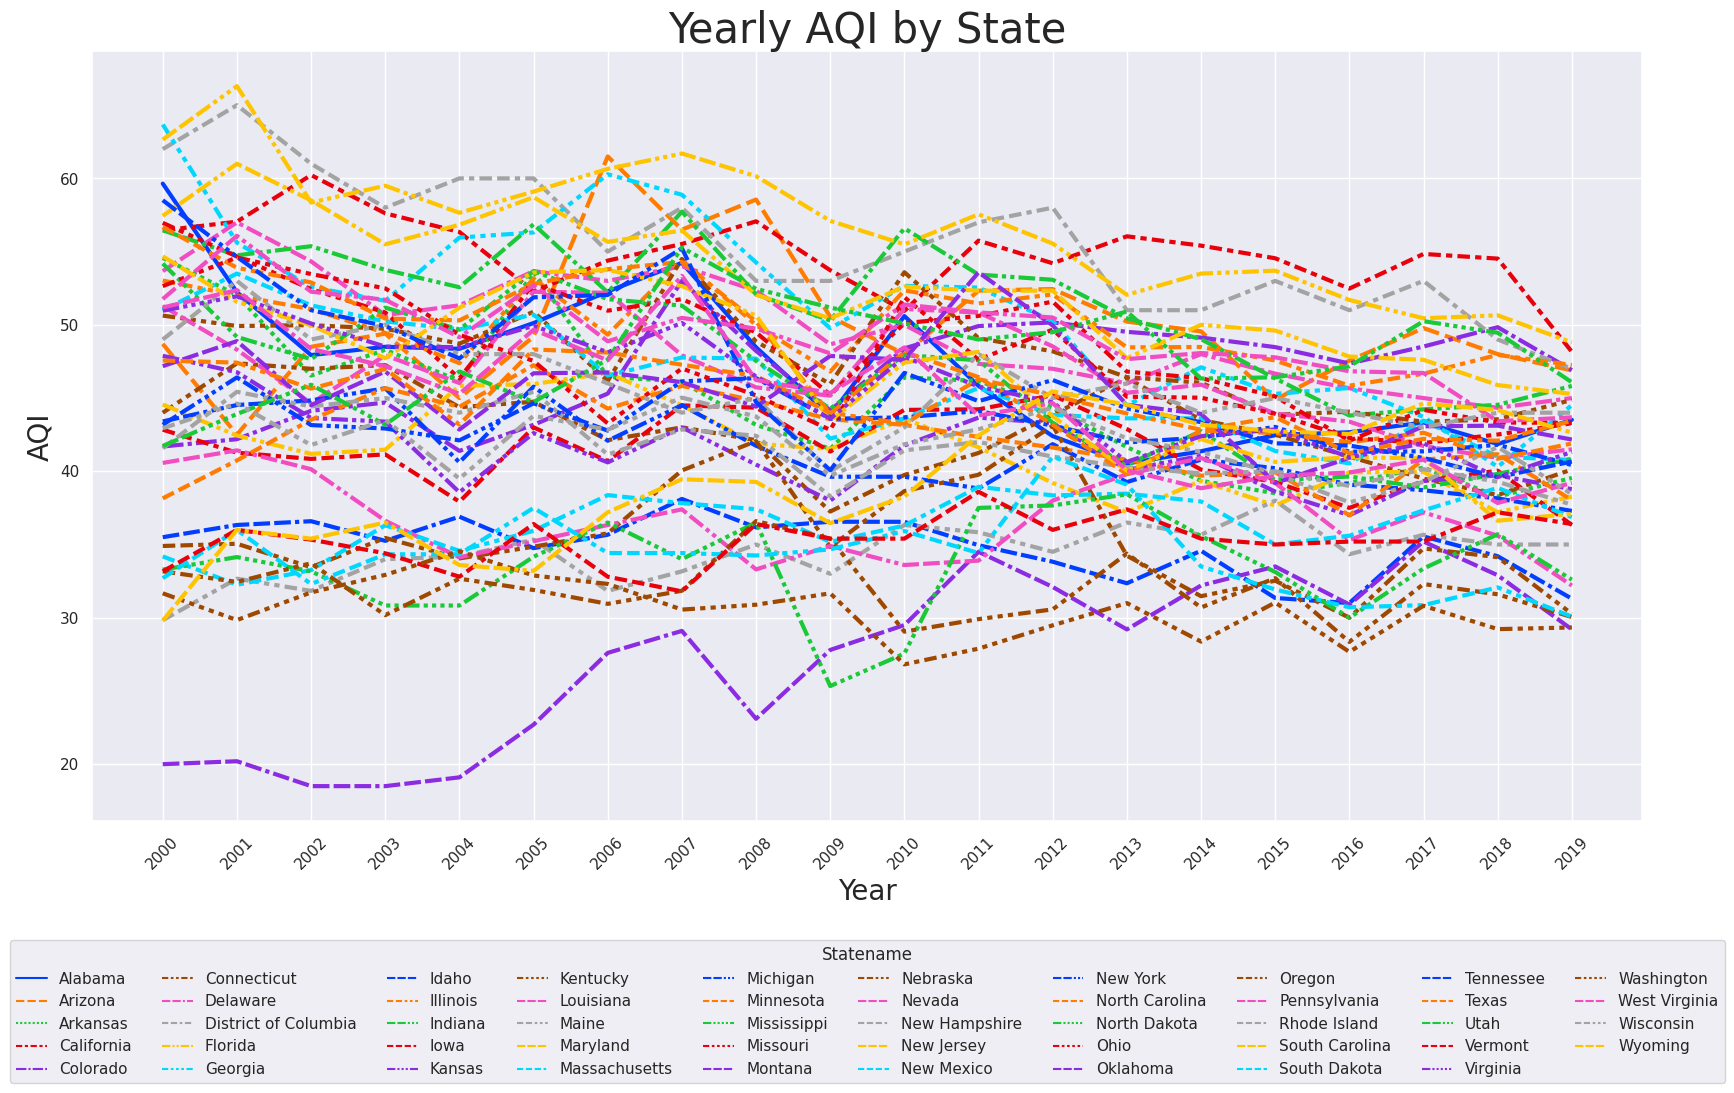

In [11]:
# Graph AQI by state over time
by_state_aqi = df.groupby(['Statename', 'Year'])['Median_aqi'].mean().unstack().T
sns.set(rc={'figure.figsize':(20, 10)})
g = sns.lineplot(data=by_state_aqi, palette='bright', linewidth=3)
sns.move_legend(g, 'lower center', bbox_to_anchor=(.5, -.35), ncol=10)
g.set_title('Yearly AQI by State',fontsize=30)
g.set_ylabel('AQI', fontsize=20)
g.set_xlabel('Year', fontsize=20)
g.set_xticks(range(2000, 2020), labels=by_state.index, rotation=45)

In [77]:
# mean column
by_state['mean'] = by_state.mean(axis=1).astype(float)

In [78]:
by_state

Statename,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,mean
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,63.38,62.91,60.89,58.78,45.67,48.67,54.56,55.42,70.59,62.27,46.28,52.04,51.81,49.13,55.95,55.39,67.91,44.01,54.62,47.93,46.72,43.46,64.51,55.06,42.07,50.38,51.20,44.49,52.13,55.26,47.23,58.23,41.88,50.67,60.62,48.87,49.49,49.83,61.90,45.75,58.06,67.39,49.45,42.49,55.61,47.28,52.51,45.49,43.11,52.84
2001,62.84,62.34,61.22,59.25,45.57,50.40,55.95,56.59,71.07,62.75,46.48,53.18,53.42,49.67,56.45,56.48,67.38,45.50,55.84,49.53,48.26,44.54,63.93,55.69,43.03,50.74,51.63,46.02,53.66,54.71,49.32,59.11,43.16,52.34,61.13,49.32,50.98,51.46,62.89,46.28,58.38,66.51,49.42,44.64,56.70,47.89,53.53,46.89,43.80,53.63
2002,63.38,62.48,60.55,59.11,44.85,50.53,56.96,57.52,71.32,63.31,45.24,53.01,53.35,49.78,55.61,56.72,67.34,45.32,56.81,49.75,47.39,44.14,64.16,55.19,40.84,50.50,50.75,46.13,54.27,54.27,49.30,59.64,42.27,52.55,59.78,49.45,51.41,51.52,63.33,46.27,58.88,66.11,47.79,44.48,57.50,48.03,54.12,46.23,42.08,53.50
2003,62.58,63.16,60.26,59.72,45.87,48.25,54.38,55.02,70.85,62.29,47.84,51.48,51.35,48.43,55.05,54.94,67.05,43.61,54.43,47.69,45.58,43.26,63.53,54.37,43.10,50.04,52.23,43.99,51.77,55.31,46.85,58.38,42.11,50.23,60.15,50.42,49.05,49.33,62.02,45.20,57.65,66.62,49.97,42.63,55.71,49.43,52.28,44.63,43.58,52.73
2004,63.13,61.59,60.82,59.43,44.70,48.85,55.61,56.49,70.82,62.97,46.33,52.35,52.53,49.07,55.17,56.13,67.85,43.87,55.67,48.15,46.30,43.38,64.28,54.74,42.72,50.16,50.96,44.62,52.96,53.35,47.69,59.05,42.03,51.36,60.52,50.40,50.14,49.63,62.84,45.65,58.61,66.80,47.97,42.87,56.73,49.48,53.47,45.14,43.17,53.03
2005,63.17,62.55,62.23,59.16,45.57,49.59,55.57,56.47,70.83,62.80,45.72,53.53,53.13,50.16,56.09,56.52,68.17,44.77,55.69,48.91,47.56,45.07,64.57,55.96,42.26,51.19,50.78,45.43,53.46,54.63,48.67,59.05,43.59,51.76,61.27,49.68,50.64,50.43,62.66,46.88,58.84,67.48,48.51,44.44,56.78,48.53,53.57,46.50,43.61,53.56
2006,64.05,62.46,61.92,59.00,45.32,51.23,57.19,57.84,71.39,63.60,46.59,53.83,53.64,50.93,57.38,56.57,68.48,47.02,57.10,50.63,48.51,46.20,64.98,56.78,43.53,51.77,51.01,47.23,54.96,54.57,50.06,59.48,45.10,52.71,62.80,49.76,51.80,52.21,63.24,47.55,59.05,68.61,48.60,46.05,57.68,48.63,54.01,47.43,43.99,54.38
2007,64.28,62.80,61.55,59.11,45.22,49.60,56.12,57.17,71.77,63.86,47.06,53.43,53.60,49.45,55.82,57.51,68.00,44.13,56.23,48.87,47.62,44.47,65.13,55.90,43.49,50.54,51.66,44.77,53.49,54.27,48.24,60.18,43.27,52.23,60.77,49.13,50.58,50.70,63.93,45.90,60.09,66.58,49.36,43.28,57.69,48.00,54.11,46.32,43.70,53.69
2008,62.71,61.98,59.68,59.34,43.86,49.80,56.15,56.75,70.62,62.42,44.84,50.69,51.30,46.51,53.45,55.15,67.30,44.92,55.91,49.20,45.74,41.45,63.52,53.15,41.04,48.07,50.79,45.30,53.55,53.12,48.34,58.70,40.74,50.63,60.00,48.29,49.99,51.19,62.19,42.91,57.73,66.85,47.27,44.15,56.86,47.01,52.58,43.62,41.01,52.42


In [80]:
# Average of all states for each year
by_state_avg = by_state.groupby('Year').mean()

In [81]:
by_state_avg

Statename,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,mean
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,63.38,62.91,60.89,58.78,45.67,48.67,54.56,55.42,70.59,62.27,46.28,52.04,51.81,49.13,55.95,55.39,67.91,44.01,54.62,47.93,46.72,43.46,64.51,55.06,42.07,50.38,51.20,44.49,52.13,55.26,47.23,58.23,41.88,50.67,60.62,48.87,49.49,49.83,61.90,45.75,58.06,67.39,49.45,42.49,55.61,47.28,52.51,45.49,43.11,52.84
2001,62.84,62.34,61.22,59.25,45.57,50.40,55.95,56.59,71.07,62.75,46.48,53.18,53.42,49.67,56.45,56.48,67.38,45.50,55.84,49.53,48.26,44.54,63.93,55.69,43.03,50.74,51.63,46.02,53.66,54.71,49.32,59.11,43.16,52.34,61.13,49.32,50.98,51.46,62.89,46.28,58.38,66.51,49.42,44.64,56.70,47.89,53.53,46.89,43.80,53.63
2002,63.38,62.48,60.55,59.11,44.85,50.53,56.96,57.52,71.32,63.31,45.24,53.01,53.35,49.78,55.61,56.72,67.34,45.32,56.81,49.75,47.39,44.14,64.16,55.19,40.84,50.50,50.75,46.13,54.27,54.27,49.30,59.64,42.27,52.55,59.78,49.45,51.41,51.52,63.33,46.27,58.88,66.11,47.79,44.48,57.50,48.03,54.12,46.23,42.08,53.50
2003,62.58,63.16,60.26,59.72,45.87,48.25,54.38,55.02,70.85,62.29,47.84,51.48,51.35,48.43,55.05,54.94,67.05,43.61,54.43,47.69,45.58,43.26,63.53,54.37,43.10,50.04,52.23,43.99,51.77,55.31,46.85,58.38,42.11,50.23,60.15,50.42,49.05,49.33,62.02,45.20,57.65,66.62,49.97,42.63,55.71,49.43,52.28,44.63,43.58,52.73
2004,63.13,61.59,60.82,59.43,44.70,48.85,55.61,56.49,70.82,62.97,46.33,52.35,52.53,49.07,55.17,56.13,67.85,43.87,55.67,48.15,46.30,43.38,64.28,54.74,42.72,50.16,50.96,44.62,52.96,53.35,47.69,59.05,42.03,51.36,60.52,50.40,50.14,49.63,62.84,45.65,58.61,66.80,47.97,42.87,56.73,49.48,53.47,45.14,43.17,53.03
2005,63.17,62.55,62.23,59.16,45.57,49.59,55.57,56.47,70.83,62.80,45.72,53.53,53.13,50.16,56.09,56.52,68.17,44.77,55.69,48.91,47.56,45.07,64.57,55.96,42.26,51.19,50.78,45.43,53.46,54.63,48.67,59.05,43.59,51.76,61.27,49.68,50.64,50.43,62.66,46.88,58.84,67.48,48.51,44.44,56.78,48.53,53.57,46.50,43.61,53.56
2006,64.05,62.46,61.92,59.00,45.32,51.23,57.19,57.84,71.39,63.60,46.59,53.83,53.64,50.93,57.38,56.57,68.48,47.02,57.10,50.63,48.51,46.20,64.98,56.78,43.53,51.77,51.01,47.23,54.96,54.57,50.06,59.48,45.10,52.71,62.80,49.76,51.80,52.21,63.24,47.55,59.05,68.61,48.60,46.05,57.68,48.63,54.01,47.43,43.99,54.38
2007,64.28,62.80,61.55,59.11,45.22,49.60,56.12,57.17,71.77,63.86,47.06,53.43,53.60,49.45,55.82,57.51,68.00,44.13,56.23,48.87,47.62,44.47,65.13,55.90,43.49,50.54,51.66,44.77,53.49,54.27,48.24,60.18,43.27,52.23,60.77,49.13,50.58,50.70,63.93,45.90,60.09,66.58,49.36,43.28,57.69,48.00,54.11,46.32,43.70,53.69
2008,62.71,61.98,59.68,59.34,43.86,49.80,56.15,56.75,70.62,62.42,44.84,50.69,51.30,46.51,53.45,55.15,67.30,44.92,55.91,49.20,45.74,41.45,63.52,53.15,41.04,48.07,50.79,45.30,53.55,53.12,48.34,58.70,40.74,50.63,60.00,48.29,49.99,51.19,62.19,42.91,57.73,66.85,47.27,44.15,56.86,47.01,52.58,43.62,41.01,52.42


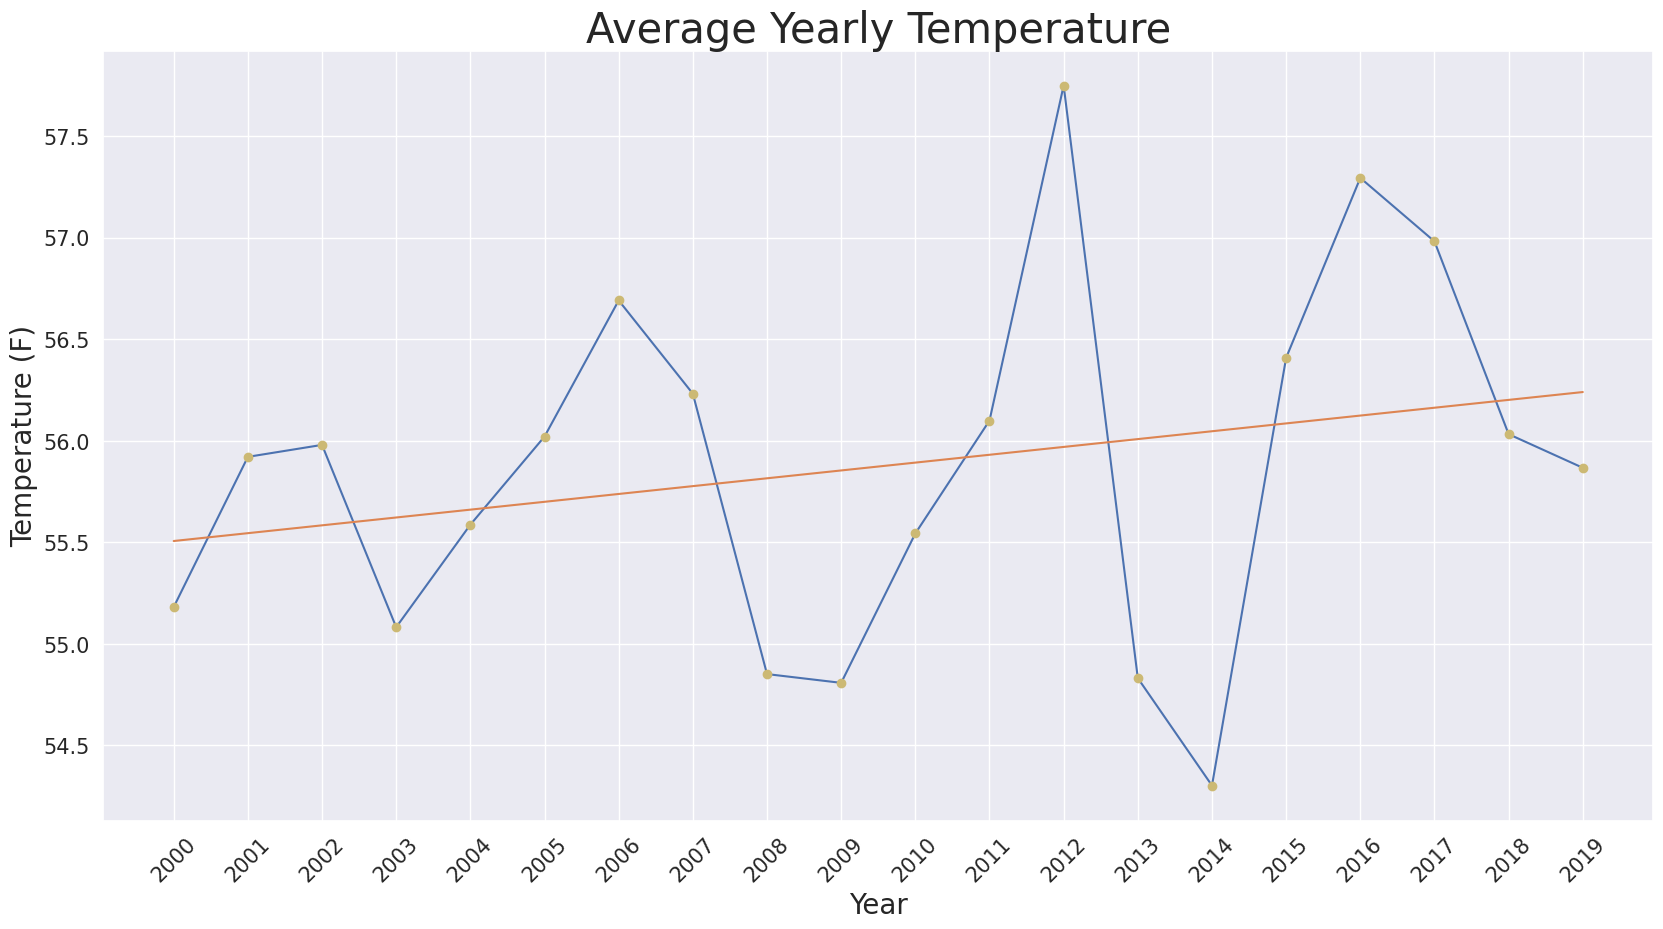

In [82]:
# graph of average yearly temperature in the US
avg_us = pd.DataFrame(df.Temp.groupby([df.Year]).mean())
sns.set(rc={'figure.figsize':(20, 10)})
g = sns.lineplot(data=avg_us, x=avg_us.index, y='Temp')

g.set_title('Average Yearly Temperature',fontsize=30)
g.set_ylabel('Temperature (F)', fontsize=20)
g.set_xlabel('Year', fontsize=20)
g.tick_params(labelsize=15)
g.set_xticks(range(2000, 2020), labels=by_state.index, rotation=45)

coef = np.polyfit(avg_us.index, avg_us['Temp'], 1)
poly1d_fn = np.poly1d(coef)
plt.plot(avg_us.index, avg_us['Temp'], 'yo', avg_us.index, poly1d_fn(avg_us.index), label='Linear Regression')

In [83]:
# Create dataframe of AVG AQI by year
avg_AQI = pd.DataFrame(df.Median_aqi.groupby([df.Year]).mean())
by_state_AQI = df.groupby(['Statename', 'Year'])['Median_aqi'].mean().unstack().T

In [84]:
# Merge the two dataframes on the year column
avg_both = avg_us.merge(avg_AQI, on='Year', how='inner')
avg_both

,Temp,Median_aqi
Year,,
2000,55.18,49.56
2001,55.92,48.82
2002,55.98,47.33
2003,55.08,47.10
2004,55.59,46.05
2005,56.02,48.47
2006,56.69,47.62
2007,56.23,49.17
2008,54.85,46.45


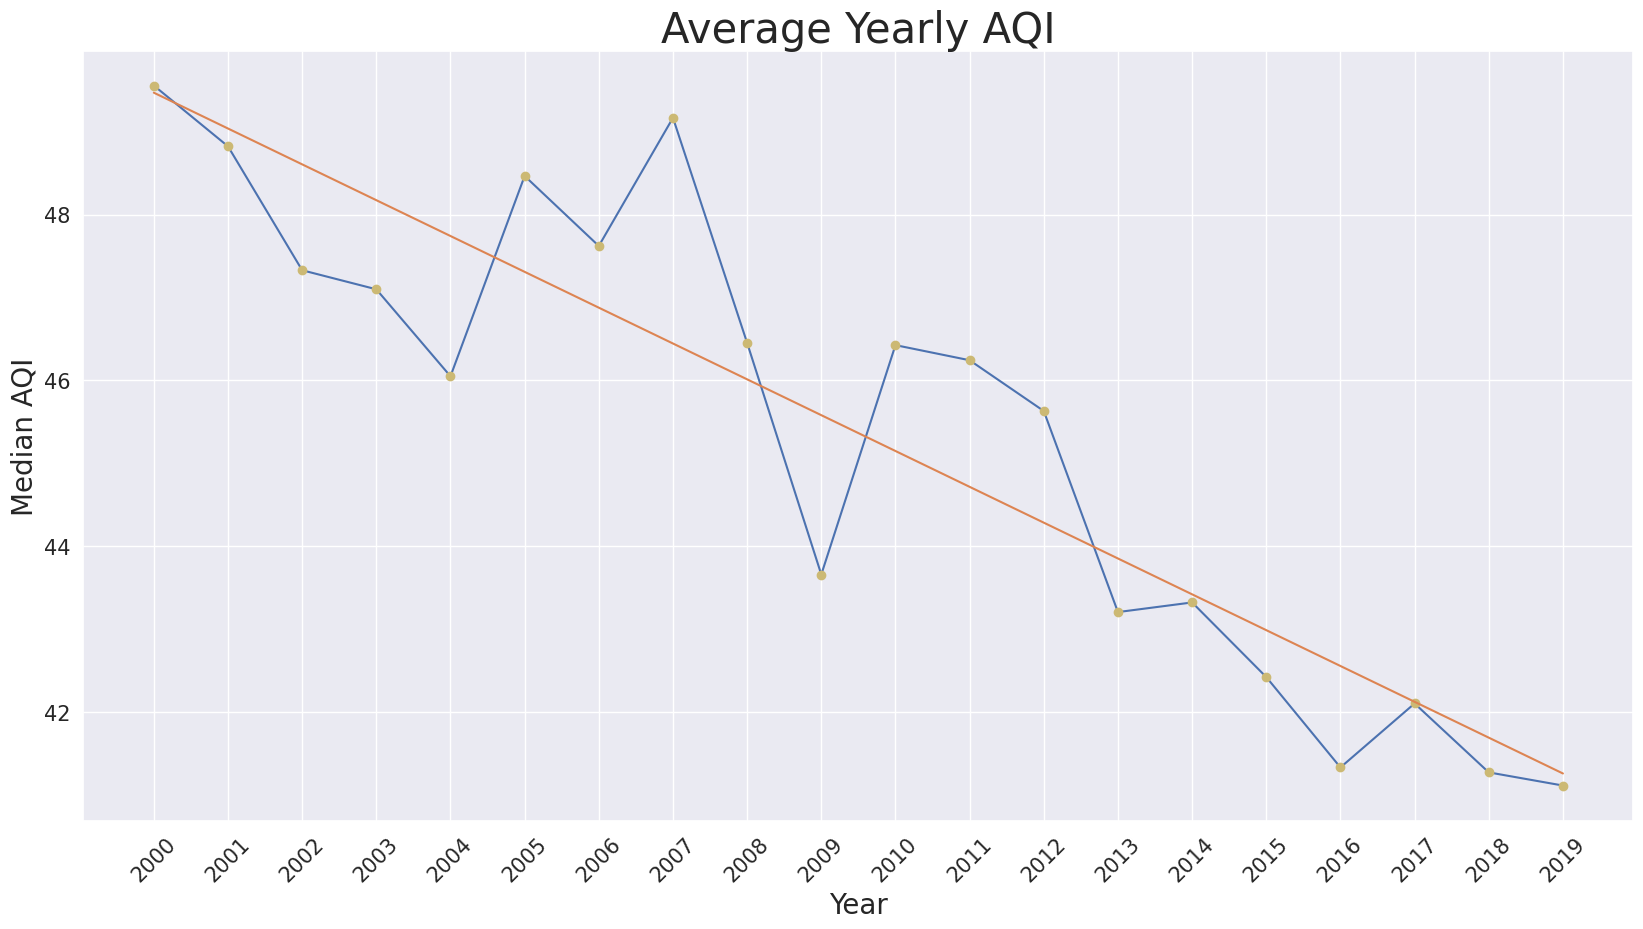

In [85]:
# graph of average AQI over time

sns.set(rc={'figure.figsize':(20, 10)})
g = sns.lineplot(data=avg_AQI, x=avg_AQI.index, y='Median_aqi')

g.set_title('Average Yearly AQI',fontsize=30)
g.set_ylabel('Median AQI', fontsize=20)
g.set_xlabel('Year', fontsize=20)
g.tick_params(labelsize=15)
g.set_xticks(range(2000, 2020), labels=by_state.index, rotation=45)

coef = np.polyfit(avg_AQI.index, avg_AQI['Median_aqi'], 1)
poly1d_fn = np.poly1d(coef)
plt.plot(avg_AQI.index, avg_AQI['Median_aqi'], 'yo', avg_AQI.index, poly1d_fn(avg_AQI.index), label='Linear Regression')

/tmp/ipykernel_5880/3689089626.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(avg_AQI.index, avg_AQI['Median_aqi'], 'r-', color='red')
/tmp/ipykernel_5880/3689089626.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax[1].plot(avg_us.index, avg_us['Temp'], 'r-', color='blue', label='Temperature', linewidth=2)


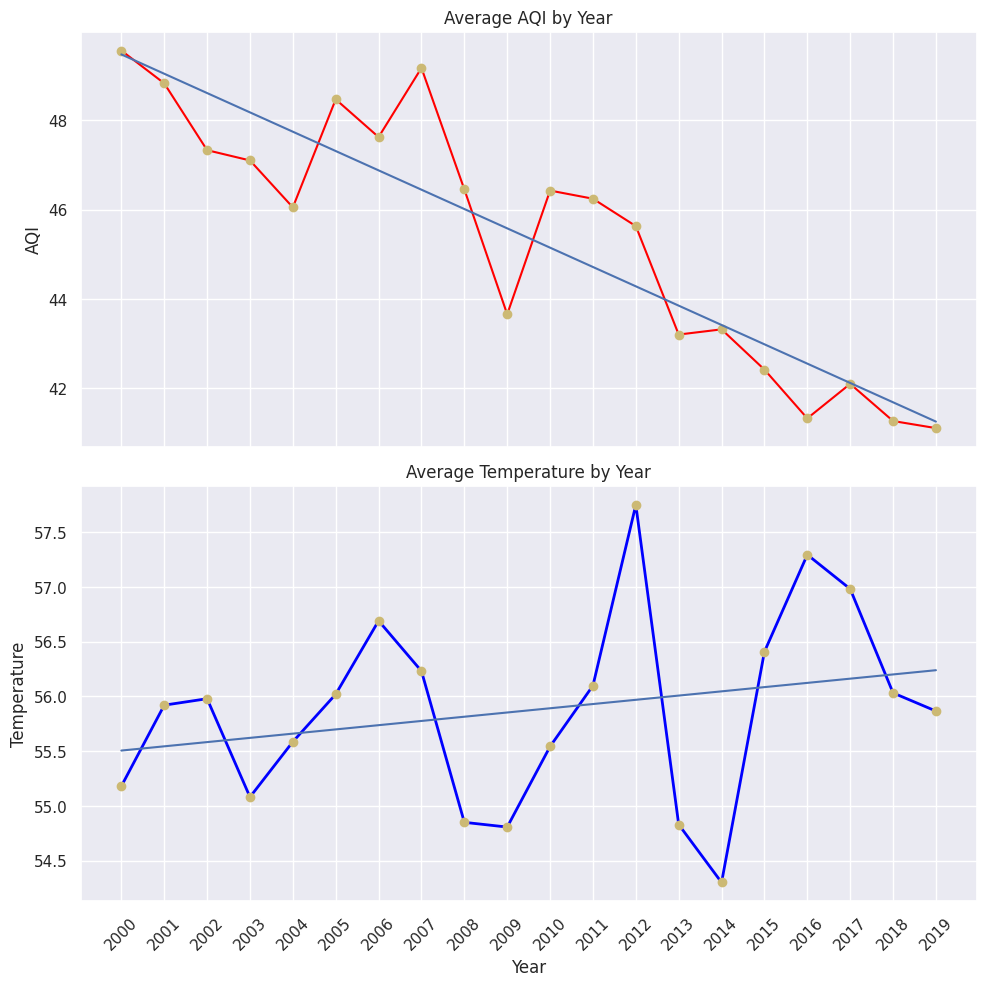

In [86]:
# plot both average AQI and average temperature by year
fig, ax = plt.subplots(2,1,sharex=True,figsize=(10, 10))\

ax[0].plot(avg_AQI.index, avg_AQI['Median_aqi'], 'r-', color='red')
ax[0].set_title('Average AQI by Year')

ax[0].set_xticks(range(2000, 2020), labels=by_state.index, rotation=45)
ax[0].set_ylabel('AQI')
coef1 = np.polyfit(avg_AQI.index, avg_AQI['Median_aqi'], 1)
poly1d_fn1 = np.poly1d(coef1)
ax[0].plot(avg_AQI.index, avg_AQI['Median_aqi'], 'yo', avg_AQI.index, poly1d_fn1(avg_AQI.index), label='Linear Regression')


ax[1].plot(avg_us.index, avg_us['Temp'], 'r-', color='blue', label='Temperature', linewidth=2)
ax[1].set_title('Average Temperature by Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Temperature')
ax[1].sharex(ax[0])
ax[1].set_xticks(range(2000, 2020), labels=by_state.index, rotation=45)
coef2 = np.polyfit(avg_us.index, avg_us['Temp'], 1)
poly1d_fn2 = np.poly1d(coef2)
ax[1].plot(avg_us.index, avg_us['Temp'], 'yo', avg_us.index, poly1d_fn2(avg_us.index), label='Linear Regression')
fig.tight_layout(pad=1.0)

plt.show()

In [87]:
avg_us.reset_index(inplace=True)
avg_us

,Year,Temp
0,2000,55.18
1,2001,55.92
2,2002,55.98
3,2003,55.08
4,2004,55.59
5,2005,56.02
6,2006,56.69
7,2007,56.23
8,2008,54.85
9,2009,54.81


In [88]:
avg_AQI.reset_index(inplace=True)
avg_AQI

,Year,Median_aqi
0,2000,49.56
1,2001,48.82
2,2002,47.33
3,2003,47.10
4,2004,46.05
5,2005,48.47
6,2006,47.62
7,2007,49.17
8,2008,46.45
9,2009,43.66


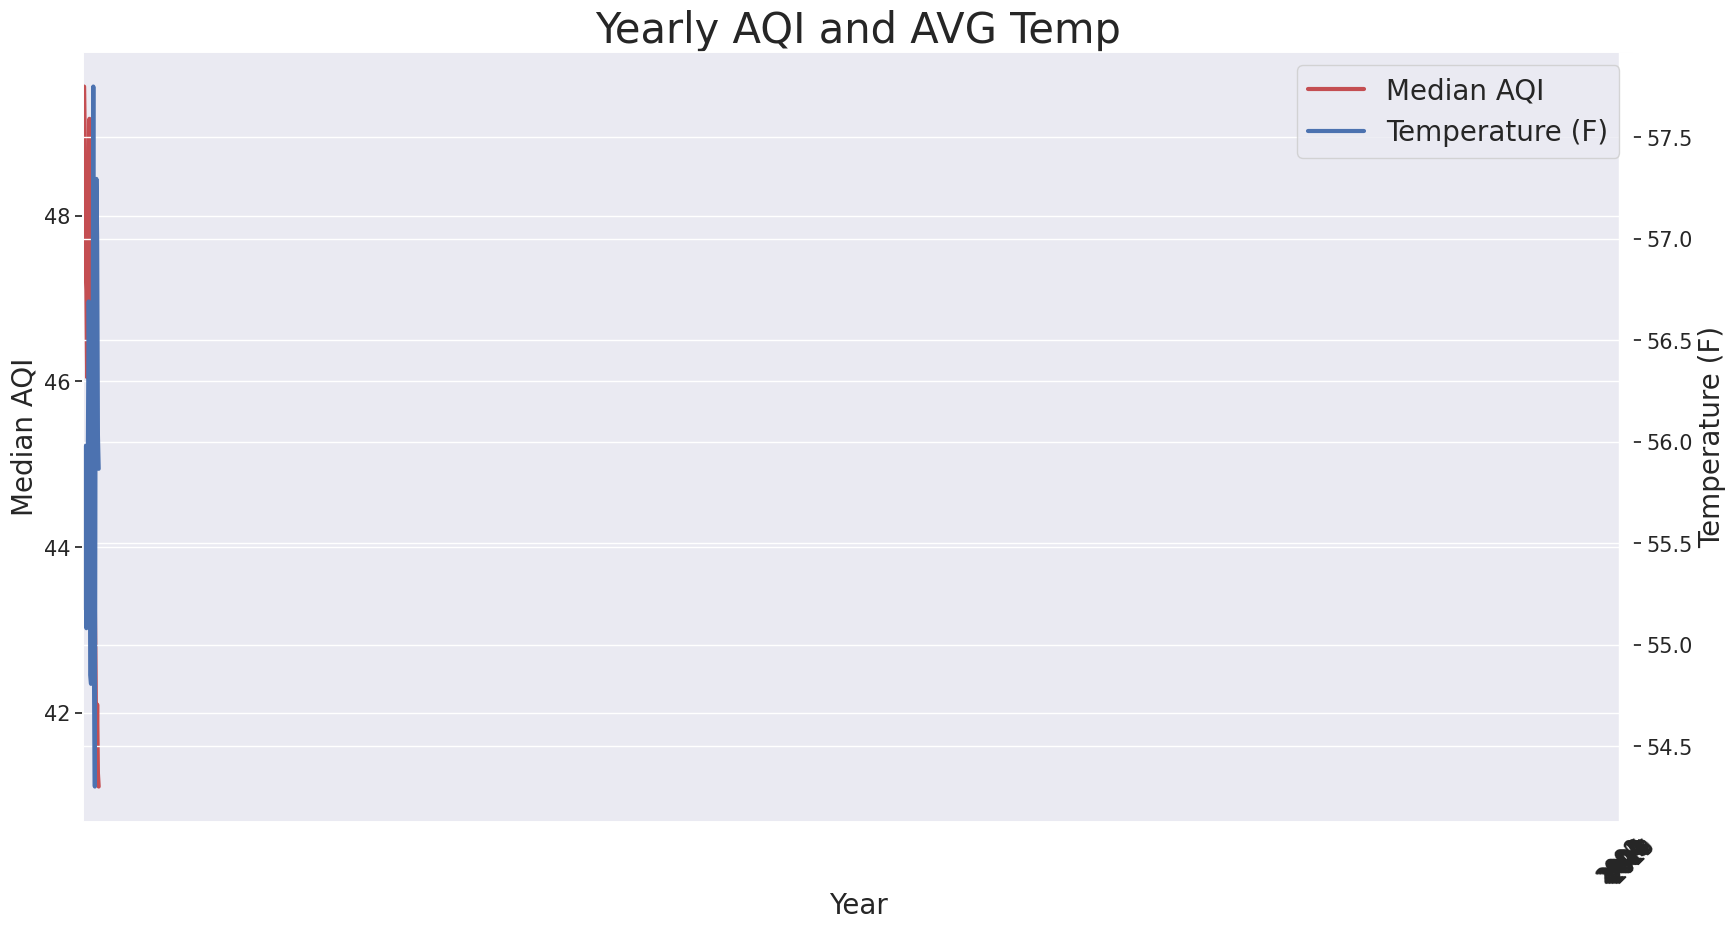

In [89]:
# Plot both AQI and AVG temp on the same graph
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()

g = ax1.plot(avg_AQI.index, avg_AQI['Median_aqi'], 'r-', label='Median AQI', linewidth=3)
i = ax2.plot(avg_us.index, avg_us['Temp'], 'b-', label='Temperature (F)', linewidth=3)

ax1.set_title('Yearly AQI and AVG Temp',fontsize=30)
ax1.set_ylabel('Median AQI', fontsize=20)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax2.set_ylabel('Temperature (F)', fontsize=20)
ax1.set_xticks(range(2000, 2020), labels=by_state.index, rotation=45)

lns = g + i
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc=0, fontsize=20)
plt.show()


In [90]:
# drop mean column for next analysis
by_state.drop('mean', axis=1, inplace=True)

In [91]:
# sanity check
by_state['Alabama'][2019] - by_state['Alabama'][2000]

1.7728680014831255

In [92]:
# create list of difference between 2019 and 2000 for each state
test = []
for column in by_state.columns:
    j = by_state[column][2019] - by_state[column][2000]
    test.append(j)
    


In [93]:
# create dataframe of temperature differences between 2019 and 2020
temp_diff = pd.DataFrame(test)
temp_diff = temp_diff.T

In [94]:
# rename columns
temp_diff.columns = by_state.columns

In [95]:
# sanity check
len(temp_diff.columns)

49

In [96]:
# gropuby state and year, get the mean of median_aqi
by_state_AQI = df.groupby(['Statename', 'Year'])['Median_aqi'].mean().unstack().T
len(by_state_AQI.columns)

49

In [97]:
# sanity check
len(temp_diff.columns)

49

In [98]:
by_state_AQI.head()

Statename,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,59.65,48.70,54.57,56.44,41.69,44.00,53.67,62.00,44.56,63.68,35.50,53.02,56.45,42.84,47.88,50.63,51.28,29.83,57.44,51.00,43.41,38.15,54.18,56.96,20.00,34.90,40.57,41.57,62.65,34.19,43.18,56.68,33.29,52.65,47.18,33.17,51.76,49.00,54.68,32.70,58.51,47.56,41.73,33.17,50.96,31.67,51.19,42.94,29.80
2001,52.23,42.50,52.03,57.04,42.19,47.38,57.00,65.00,42.44,55.61,36.33,52.00,54.75,41.27,46.76,49.92,48.31,32.67,61.00,53.50,44.53,40.74,49.18,54.67,20.20,35.05,41.43,45.43,66.30,32.25,46.41,53.90,34.14,54.60,48.89,32.44,56.08,53.00,51.57,36.00,54.64,47.42,43.91,36.00,51.95,29.84,52.37,44.62,36.00
2002,47.94,48.50,46.53,60.23,44.13,47.00,54.33,61.00,41.19,52.58,36.59,51.07,55.37,40.85,43.64,49.98,44.64,31.83,58.50,51.33,44.84,43.52,47.66,52.44,18.50,33.45,40.14,44.43,58.35,33.25,43.15,52.90,33.17,53.47,44.52,33.72,52.26,49.00,49.97,32.30,51.00,45.65,45.91,35.33,50.09,31.73,48.36,41.79,35.40
2003,48.50,49.40,48.30,57.61,44.70,47.25,50.67,58.00,41.48,51.64,35.25,49.45,53.75,41.15,43.39,49.73,47.92,34.00,55.50,50.23,45.67,45.68,51.18,50.84,18.50,35.45,36.62,45.00,59.50,36.31,42.92,50.43,30.83,52.49,46.81,30.18,51.71,50.00,47.72,34.33,49.92,46.98,43.18,34.40,48.51,32.93,47.18,43.50,36.50
2004,48.36,45.00,46.16,56.34,41.39,44.38,51.33,60.00,45.83,55.96,36.90,47.38,52.57,37.92,38.57,48.71,46.03,34.17,56.83,49.69,40.61,44.41,49.68,46.34,19.10,34.05,34.12,44.00,57.65,34.56,42.11,50.30,30.83,49.32,42.85,32.67,49.15,48.00,51.17,34.33,47.71,43.19,46.82,32.80,48.48,34.54,45.29,39.50,33.60


In [99]:
# Now that it is tested, create dataframe for AQI and temp difference
test = []
for column in by_state_AQI.columns:
    j = by_state_AQI[column][2019] - by_state_AQI[column][2000]
    test.append(j)
    
temp_diff_AQI = pd.DataFrame(test)
temp_diff_AQI = temp_diff_AQI.T
temp_diff_AQI.columns = by_state.columns
temp_diff_AQI

Statename,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,-16.13,-1.81,-15.02,-8.29,5.22,-3.88,-8.67,-15.00,-6.29,-19.16,-4.20,-5.77,-10.63,-6.51,-9.10,-5.76,-9.78,5.17,-12.17,-10.23,-6.11,-0.12,-13.33,-13.66,9.20,-4.63,-8.37,-3.86,-13.85,2.68,-2.76,-14.78,-0.69,-9.37,-5.01,-3.12,-8.08,-5.00,-17.60,-2.63,-17.84,-4.12,4.35,3.23,-9.64,-2.33,-11.98,-4.50,12.84


In [100]:
temp_AQI = temp_diff_AQI.T
temp_AQI

,0
Statename,
Alabama,-16.13
Arizona,-1.81
Arkansas,-15.02
California,-8.29
Colorado,5.22
Connecticut,-3.88
Delaware,-8.67
District of Columbia,-15.00
Florida,-6.29


In [101]:
temp_temp = temp_diff.T
temp_temp

,0
Statename,
Alabama,1.77
Arizona,-1.22
Arkansas,0.04
California,0.53
Colorado,-1.18
Connecticut,1.28
Delaware,2.69
District of Columbia,2.71
Florida,2.44


In [102]:
# combine the AQI diff and Temp diff into one dataframe
temp_comb = pd.concat([temp_AQI, temp_temp], axis=1)

In [103]:
temp_comb

,0,0
Statename,,
Alabama,-16.13,1.77
Arizona,-1.81,-1.22
Arkansas,-15.02,0.04
California,-8.29,0.53
Colorado,5.22,-1.18
Connecticut,-3.88,1.28
Delaware,-8.67,2.69
District of Columbia,-15.00,2.71
Florida,-6.29,2.44


In [104]:
# rename columns
column_list = ['Median_aqi', 'Avg_temp']
temp_comb.columns = ['Median_aqi_diff', 'Avg_temp_diff']
temp_comb

,Median_aqi_diff,Avg_temp_diff
Statename,,
Alabama,-16.13,1.77
Arizona,-1.81,-1.22
Arkansas,-15.02,0.04
California,-8.29,0.53
Colorado,5.22,-1.18
Connecticut,-3.88,1.28
Delaware,-8.67,2.69
District of Columbia,-15.00,2.71
Florida,-6.29,2.44


In [105]:
# sanity check
temp_comb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, Alabama to Wyoming
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Median_aqi_diff  49 non-null     float64
 1   Avg_temp_diff    49 non-null     float64
dtypes: float64(2)
memory usage: 2.2+ KB


In [106]:
# Save to CSV
temp_comb.sort_values(by=['Avg_temp_diff'], ascending=False, inplace=True)
temp_comb.to_csv('temp_comb.csv')

In [107]:
temp_comb

,Median_aqi_diff,Avg_temp_diff
Statename,,
Georgia,-19.16,2.98
Virginia,-9.64,2.81
District of Columbia,-15.00,2.71
Delaware,-8.67,2.69
North Carolina,-14.78,2.68
South Carolina,-17.60,2.57
Maryland,-12.17,2.49
Florida,-6.29,2.44
West Virginia,-11.98,2.32


<Axes: ylabel='Statename'>

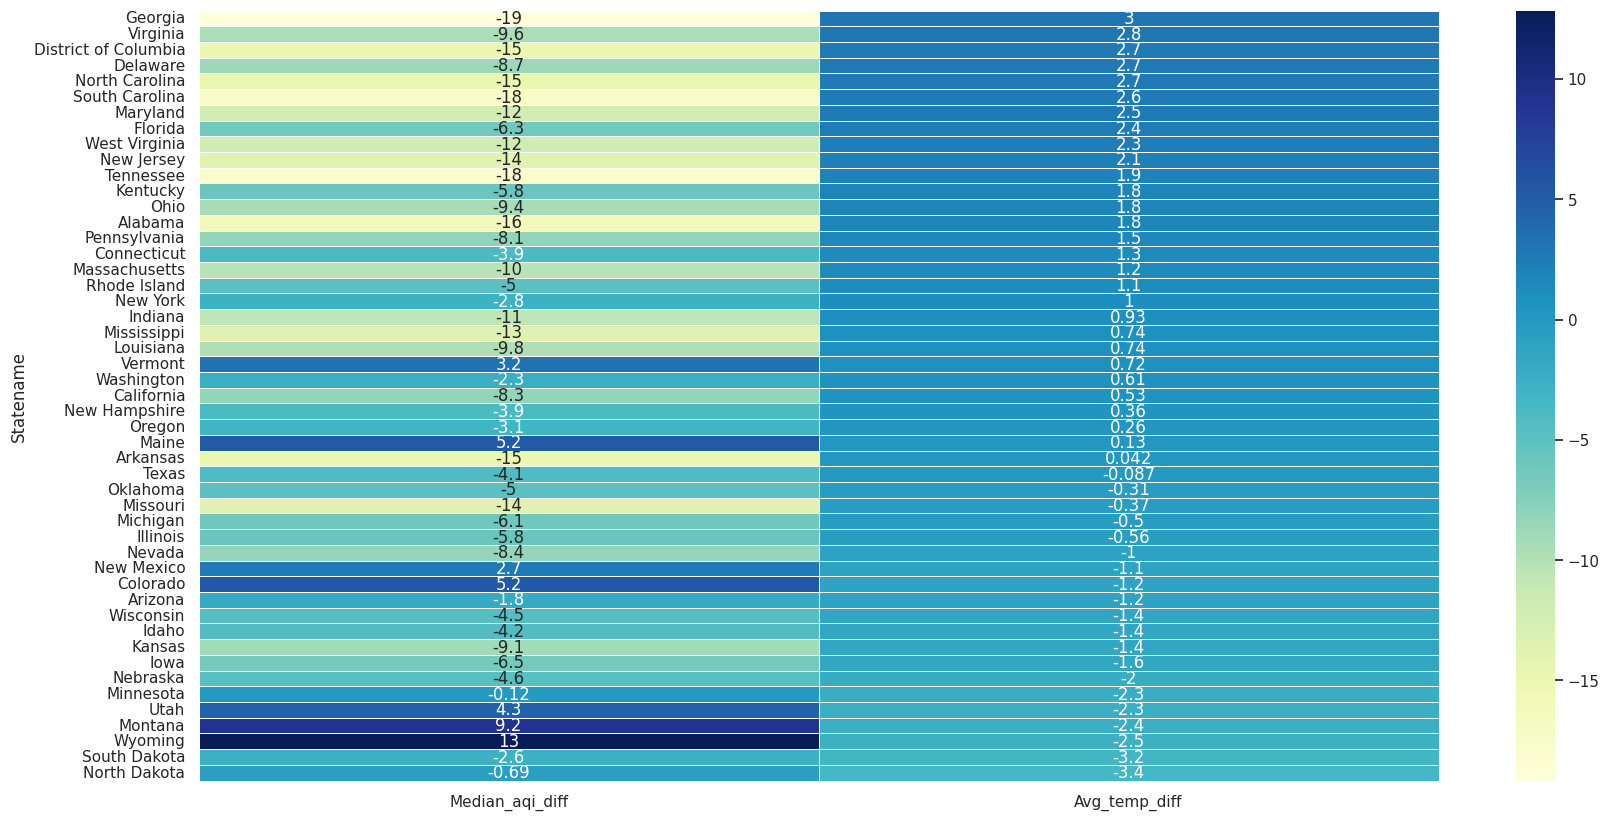

In [108]:
# create heat map of for initial sanity check
sns.heatmap(temp_comb, annot=True,linewidths=.5, cmap="YlGnBu")

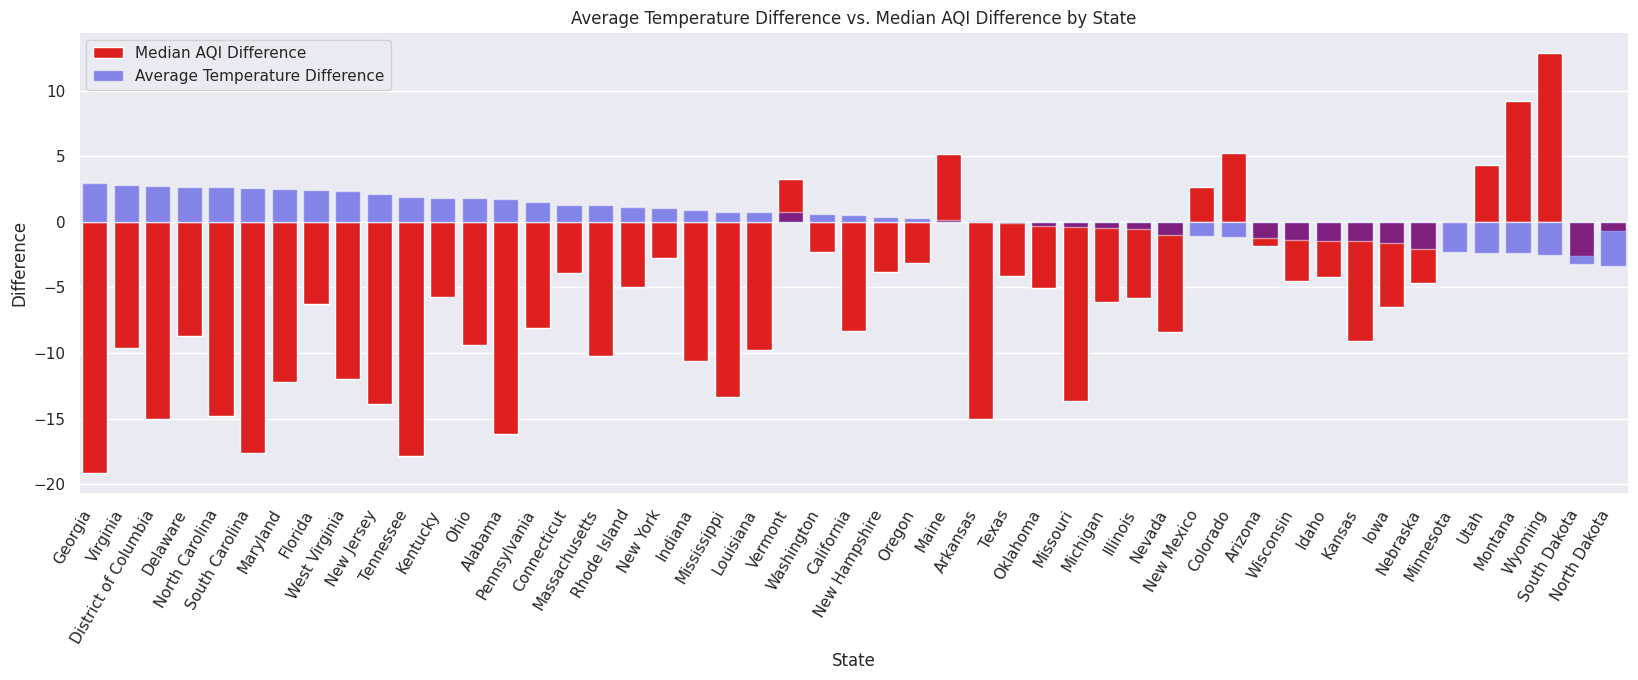

In [109]:
# plot average temperature difference vs. median AQI difference by state
plt.figure(figsize=(20, 6))

g = sns.barplot(data=temp_comb, x=temp_comb.index, y='Median_aqi_diff', color='red', label='Median AQI Difference')
h = sns.barplot(data=temp_comb, x=temp_comb.index, y='Avg_temp_diff', color='blue', alpha=0.5, label='Average Temperature Difference')

g.set_xticklabels(g.get_xticklabels(), rotation=60, horizontalalignment='right')

plt.xlabel('State')
plt.ylabel('Difference')
plt.title('Average Temperature Difference vs. Median AQI Difference by State')
plt.legend()
plt.show()


### Cell below is bad bad bad. Keeping for educational purposes

/tmp/ipykernel_741/138975903.py:80: RuntimeWarning: invalid value encountered in sqrt
  colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:]


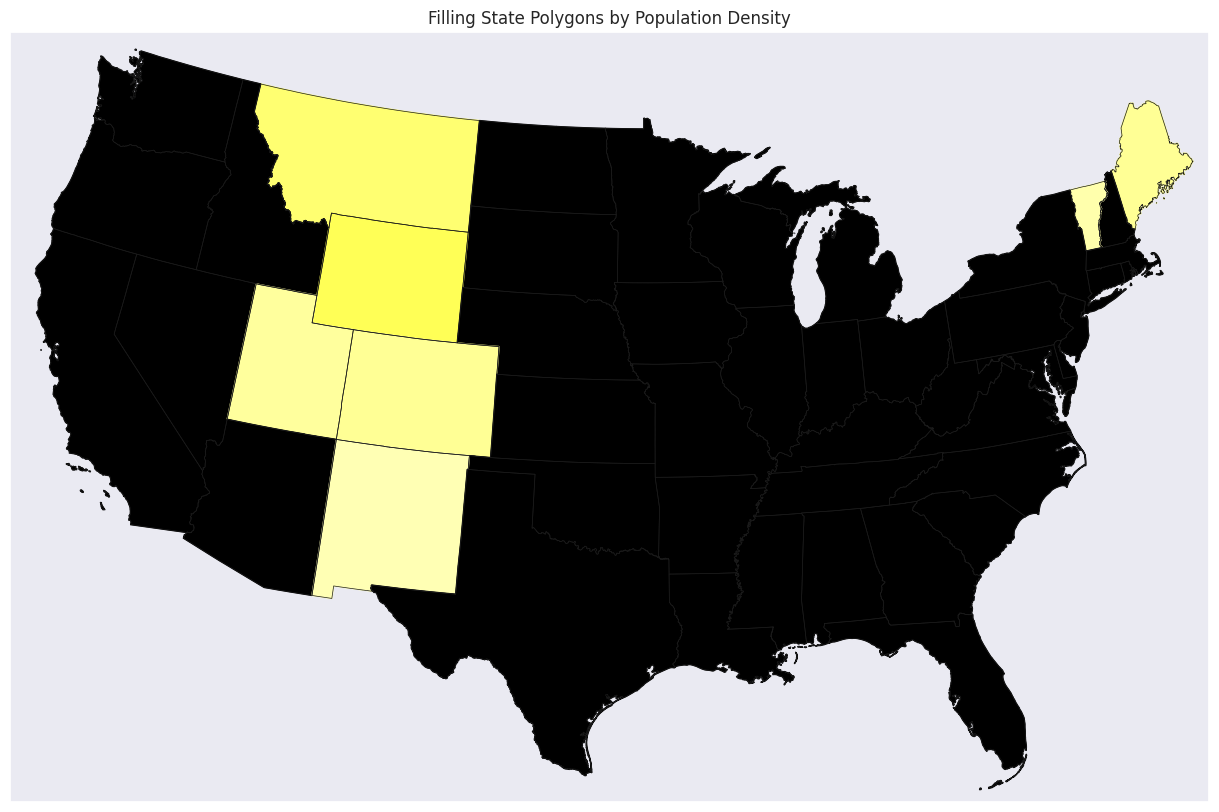

In [43]:
# import mpl_toolkits
# from mpl_toolkits.basemap import Basemap
# import numpy as np
# import matplotlib.pyplot as plt
# # import mpl_toolkits as mpl
# # from mpl_toolkits import Basemap as Basemap
# from matplotlib.colors import rgb2hex
# from matplotlib.patches import Polygon
# # Lambert Conformal map of lower 48 states.
# m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
#         projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# # draw state boundaries.
# # data from U.S Census Bureau
# # http://www.census.gov/geo/www/cob/st2000.html
# shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# # population density by state from
# # http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
# popdensity = {
# 'New Jersey':  -13.85,
# 'Rhode Island':   -5.00,
# 'Massachusetts':   -10.23,
# 'Connecticut':    -3.88,
# 'Maryland':   -12.17,
# 'New York':    -2.76,
# 'Delaware':    -8.67,
# 'Florida':     -6.29,
# 'Ohio':  -9.37,
# 'Pennsylvania':  -8.08,
# 'Illinois':    -5.77,
# 'California':  -8.29,
# 'Hawaii':  0,
# 'Virginia':    -9.64,
# 'Michigan':    -6.11,
# 'Indiana':    -10.63,
# 'North Carolina':  -14.78,
# 'Georgia':     -19.16,
# 'Tennessee':   -17.84,
# 'New Hampshire':   -3.86,
# 'South Carolina':  -17.60,
# 'Louisiana':   -9.78,
# 'Kentucky':   -5.76,
# 'Wisconsin':  -4.50,
# 'Washington':  -2.33,
# 'Alabama':     -16.13,
# 'Missouri':    -13.66,
# 'Texas':   -4.12,
# 'West Virginia':   -11.98,
# 'Vermont':     3.23,
# 'Minnesota':  -0.12,
# 'Mississippi':   -13.33,
# 'Iowa':  -6.51,
# 'Arkansas':    -15.02,
# 'Oklahoma':    -5.01,
# 'Arizona':     -1.81,
# 'Colorado':    5.22,
# 'Maine':  5.17,
# 'Oregon':  -3.12,
# 'Kansas':  -9.10,
# 'Utah':  4.35,
# 'Nebraska':    -4.63,
# 'Nevada':  -8.37,
# 'Idaho':   -4.20,
# 'New Mexico':  2.68,
# 'South Dakota':  -2.63,
# 'North Dakota':  -0.69,
# 'Montana':     9.20,
# 'Wyoming':      12.84,
# 'Alaska':     0}
# # choose a color for each state based on population density.
# colors={}
# statenames=[]
# cmap = plt.cm.hot # use 'hot' colormap
# vmin = 0; vmax = 450 # set range.
# for shapedict in m.states_info:
#     statename = shapedict['NAME']
#     # skip DC and Puerto Rico.
#     if statename not in ['District of Columbia','Puerto Rico']:
#         pop = popdensity[statename]
#         # calling colormap with value between 0 and 1 returns
#         # rgba value.  Invert color range (hot colors are high
#         # population), take sqrt root to spread out colors more.
#         colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:]
#     statenames.append(statename)
# # cycle through state names, color each one.
# ax = plt.gca() # get current axes instance
# for nshape,seg in enumerate(m.states):
#     # skip DC and Puerto Rico.
#     if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
#         color = rgb2hex(colors[statenames[nshape]]) 
#         poly = Polygon(seg,facecolor=color,edgecolor=color)
#         ax.add_patch(poly)
# plt.title('Filling State Polygons by Population Density')
# plt.show()

## Start here for US State plotting

In [111]:
# import libraries and read temp_comb into geodataframe
import requests
import geopandas
import numpy as np

np.random.seed(5)

URL = 'https://github.com/kjhealy/us-county/raw/master/data/geojson/gz_2010_us_040_00_500k.json'
us_json = requests.get(URL).json()

usa = geopandas.read_file('temp_comb.csv')

usa

,Statename,Median_aqi_diff,Avg_temp_diff,geometry
0,Georgia,-19.160519480519483,2.980240981240975,None
1,Virginia,-9.642901813633522,2.8146289347508855,None
2,District of Columbia,-15.0,2.708333333333343,None
3,Delaware,-8.666666666666664,2.686111111111117,None
4,North Carolina,-14.784210526315789,2.6796461988304117,None
5,South Carolina,-17.595238095238095,2.5724702380952422,None
6,Maryland,-12.166666666666664,2.4912037037036967,None
7,Florida,-6.288248337028826,2.43734756097561,None
8,West Virginia,-11.976851851851848,2.315393518518519,None
9,New Jersey,-13.850000000000001,2.092083333333335,None


In [112]:
# read in shapefile for geometry
test = geopandas.read_file('st99_d00.shp')
test.head()

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,LSAD_TRANS,geometry
0,271.25,227.17,2,1,02,Alaska,01,4,9,NaN,"POLYGON ((-147.78711 70.24536, -147.76510 70.2..."
1,0.00,0.35,3,2,02,Alaska,01,4,9,NaN,"POLYGON ((-166.05315 66.26494, -166.03187 66.2..."
2,0.00,0.15,4,3,02,Alaska,01,4,9,NaN,"POLYGON ((-168.89322 65.74470, -168.89875 65.7..."
3,0.03,0.71,5,4,02,Alaska,01,4,9,NaN,"POLYGON ((-168.21012 64.99896, -168.20791 65.0..."
4,0.89,7.36,6,5,02,Alaska,01,4,9,NaN,"POLYGON ((-171.73986 63.71712, -171.73321 63.7..."


In [113]:
# Rename columns for graphing
test.rename(columns={'NAME': 'Statename', 'geometry': 'geometry_y'}, inplace=True)


In [114]:
# merge shape file with temp_comb data
merged_test = test.merge(temp_comb, on='Statename', how='inner')
merged_test.to_csv('merged_test.csv')
merged_test.head()

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,Statename,LSAD,REGION,DIVISION,LSAD_TRANS,geometry_y,Median_aqi_diff,Avg_temp_diff
0,25.54,31.41,83,82,27,Minnesota,01,2,4,NaN,"POLYGON ((-95.15332 49.19311, -95.15342 49.249...",-0.12,-2.27
1,20.85,30.72,84,83,53,Washington,01,4,9,NaN,"POLYGON ((-122.29069 49.00243, -122.28565 49.0...",-2.33,0.61
2,0.00,0.17,85,84,53,Washington,01,4,9,NaN,"POLYGON ((-123.09055 49.00198, -123.06793 49.0...",-2.33,0.61
3,0.00,0.33,89,88,53,Washington,01,4,9,NaN,"POLYGON ((-122.71539 48.74854, -122.70306 48.7...",-2.33,0.61
4,0.00,0.19,90,89,53,Washington,01,4,9,NaN,"POLYGON ((-123.02549 48.71797, -123.01970 48.7...",-2.33,0.61


# Ok Seriously, start here for US State Plotting

In [115]:
# Load merged_test.csv and sort the data
import requests
import geopandas
import numpy as np

np.random.seed(5)

URL = 'https://github.com/kjhealy/us-county/raw/master/data/geojson/gz_2010_us_040_00_500k.json'
us_json = requests.get(URL).json()

usa = geopandas.read_file('merged_test.csv')
usa.sort_values("Statename", inplace=True)
usa

,field_1,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,Statename,LSAD,REGION,DIVISION,LSAD_TRANS,geometry_y,Median_aqi_diff,Avg_temp_diff,geometry
126,126,12.8900397298551,17.8395471635368,201,200,01,Alabama,01,3,6,,"POLYGON ((-87.359281 35.001823, -87.349251 35....",-16.127919911012242,1.7728680014831255,None
127,127,0.00205084152344975,0.515995969917856,213,212,01,Alabama,01,3,6,,POLYGON ((-88.18846927356692 30.24693405418442...,-16.127919911012242,1.7728680014831255,None
115,115,28.921282569663,23.6316376171869,190,189,04,Arizona,01,4,8,,"POLYGON ((-109.045223 36.999084, -109.045244 3...",-1.8111111111111171,-1.2150000000000034,None
124,124,13.585317196048,21.7334969633995,197,196,05,Arkansas,01,3,7,,POLYGON ((-94.47604975824325 36.49931991250241...,-15.021212121212123,0.04184343434343418,None
80,80,0.000276696887876876,0.0684724811442637,188,187,06,California,01,4,9,,POLYGON ((-122.37850005443454 37.8265049602404...,-8.285353535353536,0.5257828282828285,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,48,0.00896176363286832,0.514083223330971,110,109,55,Wisconsin,01,2,3,,"POLYGON ((-86.94751 45.366434, -86.955204 45.3...",-4.5,-1.3661458333333343,None
47,47,0.00692280870250433,0.612667402760946,104,103,55,Wisconsin,01,2,3,,POLYGON ((-90.57391605543677 46.84424524013309...,-4.5,-1.3661458333333343,None
46,46,16.4569823243296,22.9843281433234,103,102,55,Wisconsin,01,2,3,,"POLYGON ((-90.418136 46.566094, -90.41562 46.5...",-4.5,-1.3661458333333343,None
49,49,3.72420290000244e-05,0.035917331221348,113,112,55,Wisconsin,01,2,3,,"POLYGON ((-87.500105 45.061117, -87.498964 45....",-4.5,-1.3661458333333343,None


In [116]:
# apply wkt.loads to geometry_y column
from shapely import wkt
usa['geometry_y'] = usa['geometry_y'].apply(wkt.loads)

In [117]:
# set 'geometry_y column as the required geometry column for geopandas
usa.set_geometry('geometry_y', inplace=True)
usa.geometry.name

'geometry_y'

In [118]:
# convert Avg_temp_diff to float
usa['Avg_temp_diff'] = usa['Avg_temp_diff'].astype(float)
usa['Avg_temp_diff'].info

<bound method Series.info of 126    1.77
127    1.77
115   -1.22
124    0.04
80     0.53
       ... 
48    -1.37
47    -1.37
46    -1.37
49    -1.37
61    -2.54
Name: Avg_temp_diff, Length: 150, dtype: float64>

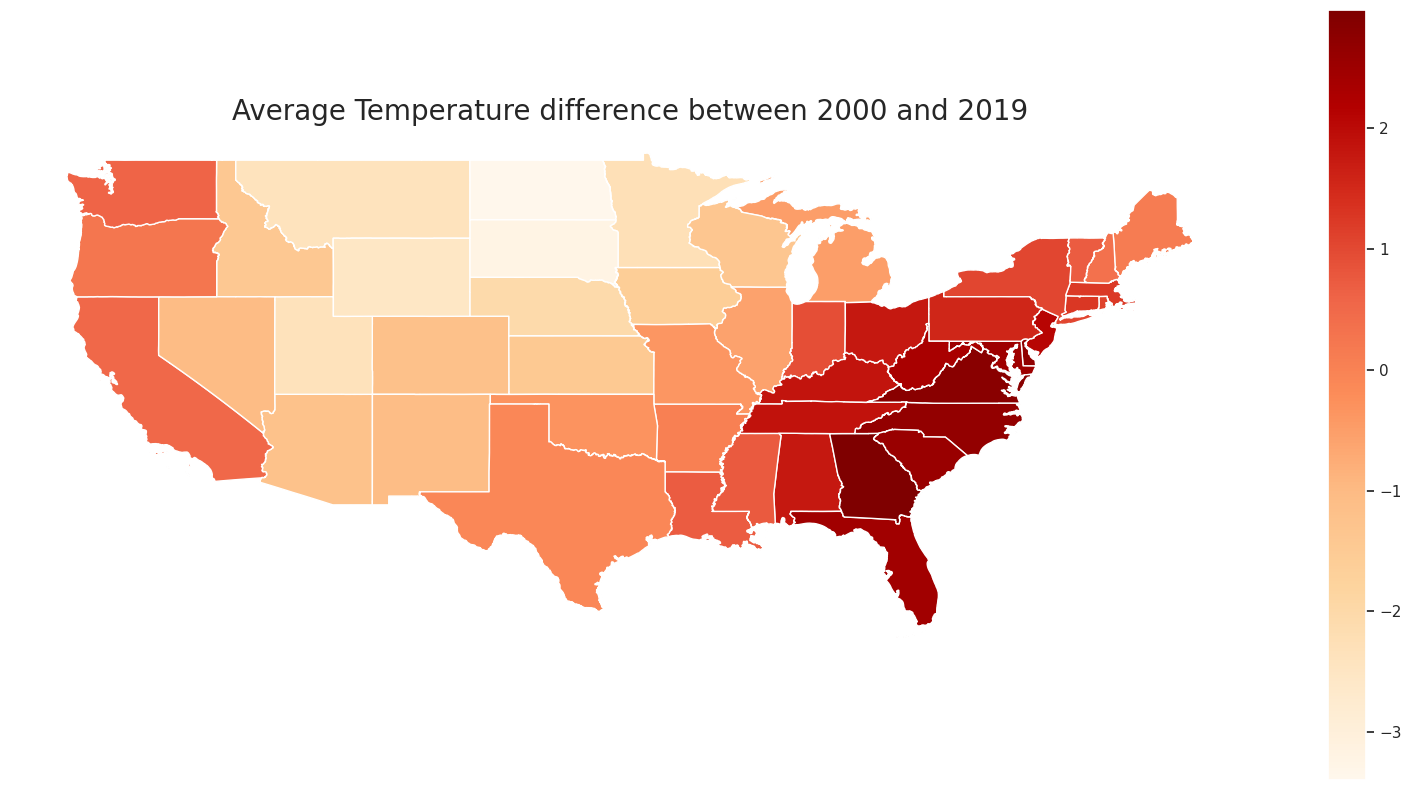

In [119]:
# plot the average temperature difference between 2000 and 2019
ax = usa.plot(column='Avg_temp_diff', cmap='OrRd',  legend=True, figsize=(20,10))

plt.title('Average Temperature difference between 2000 and 2019', fontsize=20)
ax.set_axis_off()
plt.show()
# usa.plot()

In [122]:
# convert median_aqi_diff to float
print(type(usa['Median_aqi_diff'][0]))
usa['Median_aqi_diff'] = usa['Median_aqi_diff'].astype(float)
print(type(usa['Median_aqi_diff'][0]))

<class 'str'>
<class 'numpy.float64'>


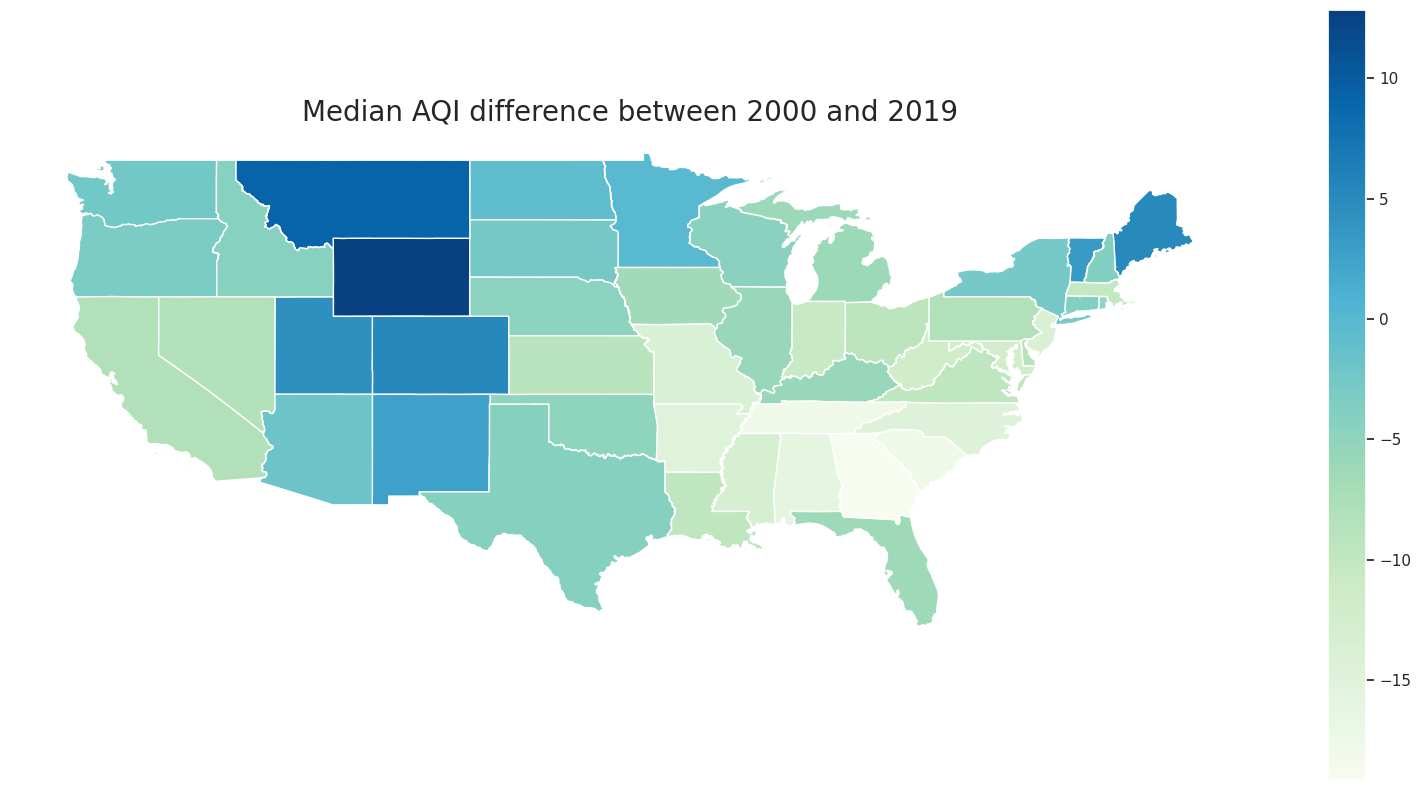

In [124]:
# plot the median AQI difference between 2000 and 2019
ay = usa.sort_values(by='Median_aqi_diff', ascending=False).plot(column='Median_aqi_diff', cmap='GnBu',legend=True, figsize=(20,10))

plt.title('Median AQI difference between 2000 and 2019', fontsize=20)
ay.set_axis_off()
plt.show()